# Camfollower library
site: https://github.com/ochoadavid/camfollower

author: **ochoadavid at gmail.com**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import camgen as cg
import genfunc as gf
%matplotlib inline

In [2]:
h = 1.0
usefun = gf.Armonic # try Armonic, Cycloidal, Parabolic, Poly345, Poly4567, Uniform
flist = []
flist.append(usefun(0, 100, h_end=h))
flist.append(gf.TopDwell(100,110, h_end=h))
flist.append(usefun(110, 210, ret=True, h_end=h))
flist.append(gf.BottomDwell(210,360, h_end=h))

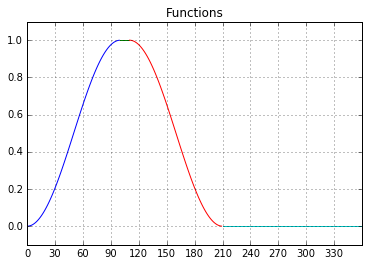

In [3]:
xs = []
ys = []
for fun in flist:
    x1, y1 = fun.plotgen()
    xs.append(x1)
    ys.append(y1)
    plt.plot(x1, y1)
plt.xlim((0,360))
plt.ylim((-0.1,h + 0.1))
plt.xticks(np.arange(0,360,30))
plt.grid()
plt.title("Functions");

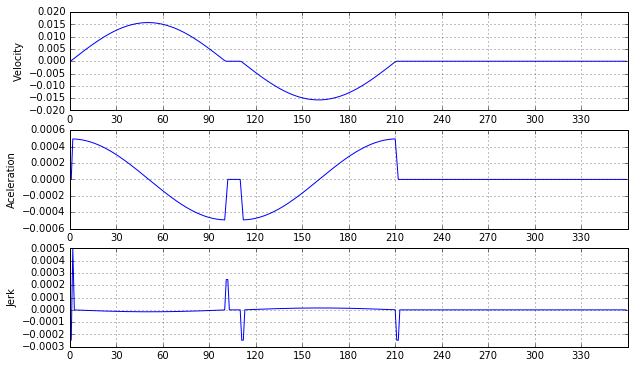

In [4]:
x = np.hstack(xs)
y = np.hstack(ys)
y_1 = np.hstack([y[1]-y[-1],np.diff(y)])
y_2 = np.hstack([y_1[1]-y_1[-1],np.diff(y_1)])
y_3 = np.hstack([y_2[1]-y_2[-1],np.diff(y_2)])
plt.figure(figsize=(10,6))
ax1 = plt.subplot(311)
plt.plot(x, y_1)
plt.xlim((0,360))
plt.xticks(np.arange(0,360,30))
plt.grid()
plt.ylabel("Velocity");
ax2 = plt.subplot(312)
plt.plot(x, y_2)
plt.xlim((0,360))
plt.xticks(np.arange(0,360,30))
plt.grid()
plt.ylabel("Aceleration");
ax2 = plt.subplot(313)
plt.plot(x, y_3)
plt.xlim((0,360))
plt.xticks(np.arange(0,360,30))
plt.grid()
plt.ylabel("Jerk");

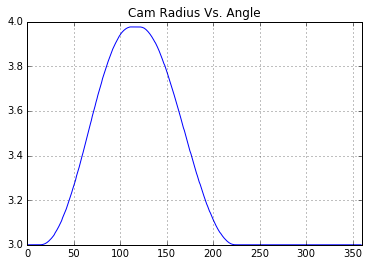

In [5]:
cam = cg.GeneratorCil(4, 1, genfunc=flist, excentricity=1.0)
cam.profile_gen()
plt.plot(cam.theta, cam.values)
plt.xlim([0,360])
plt.grid()
plt.title("Cam Radius Vs. Angle");

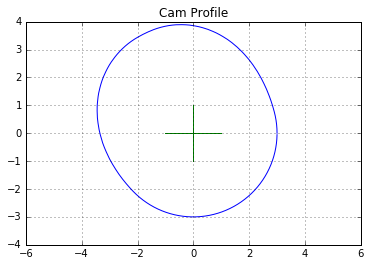

In [6]:
x, y = cam.xy_profile()
plt.plot(x, y)
plt.plot([1,-1,0,0,0],[0,0,0,-1,1])
plt.axis('equal')
plt.grid(True)
plt.title("Cam Profile");

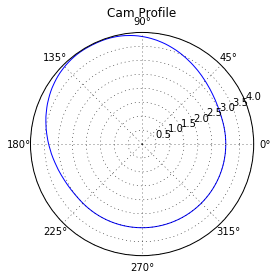

In [7]:
ax = plt.subplot(111, projection='polar')
ax.plot(cam.theta * np.pi / 180, cam.values)
plt.grid(True)
plt.title("Cam Profile");

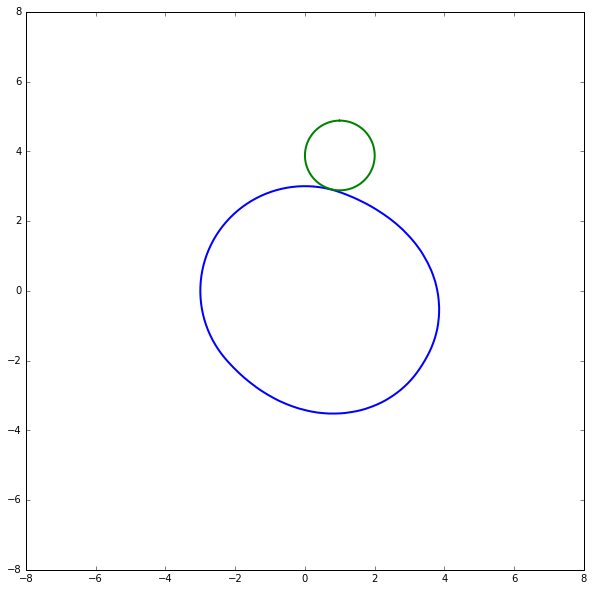

In [8]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10,10))

limit = cam.rp * 2
ax.set_xlim((-limit, limit))
ax.set_ylim((-limit, limit))
#ax.axis('equal')

line, = ax.plot([], [], lw=2)
line1, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    line1.set_data([], [])
    return (line, line1)

def animate(i):
    x, y = cam.xy_profile(rotate_angle=i)
    line.set_data(y, x)
    x1, y1 = cam.xy_follower(i)
    line1.set_data(y1, x1)
    return (line,line1)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(0.0,360.0,5.0), interval=50, blit=True)

HTML(anim.to_html5_video())